# Rektyfikacja

In [1]:
import numpy as np                         # numeric
import matplotlib.pyplot as plt            # plotting
import matplotlib as mpl                   # plotting
from IPython.display import display, Image # display imported graphics

In [2]:
import os.path 

isdir = os.path.isdir('lib_nn') # check whether 'lib_nn' exists

if not isdir:
   !git clone https://github.com/bronwojtek/lib_nn.git # cloning the library from github

import sys                     
sys.path.append('./lib_nn') 

from neural import *            # importing my library package

Invoking __init__.py for neural


In [3]:
def fi(x):
    return 0.2+0.8*np.sin(x)+0.5*x-3 # some function

def data(): 
    x = 7.*np.random.rand() # random x coordinate
    y = fi(x)+0.4*func.rn() # y coordinate = the function + noise from [-0.2,0.2]
    return [x,y]

In [4]:
tab=np.array([data() for i in range(200)])    # data sample
features=np.delete(tab,1,1)                   # x coordinate
labels=np.delete(tab,0,1)                     # y coordinate

W poprzednim rozdziale utworzyliśmy z dwóch sigmoidów funkcję o kształcie garbu, która, jak pokazaliśmy, mogła stanowić funkcję bazową dla aproksymacji. Możemy teraz zadać nastepujące pytanie: czy możemy skonstruować sam sigmoid jako kombinację liniową (różnicę) pewych innych funkcji? Wtedy moglibyśmy użyć tychże funkcji do aktywacji neuronów zamiast sigmoidu. Odpowiedź brzmi **tak**. Na przykład funkcja **Rectified Linear Unit (ReLU)** 

$$
{\rm ReLU}(x) = \left \{ \begin{array}{l} x {\rm ~~~ for~} x \ge 0 \\
                                          0 {\rm ~~~ for~} x < 0 \end{array}    \right . = {\rm max}(x,0)
$$

wykonuje (w przybliżeniu) to zadanie. Ta nieco niezręczna nazwa pochodzi z elektrotechniki (rektyfikacja oznacza prostowanie), w której prostownik służy do odcinania ujemnych wartości sygnału elektrycznego. Wykres funkcji ReLU wygląda następująco:   

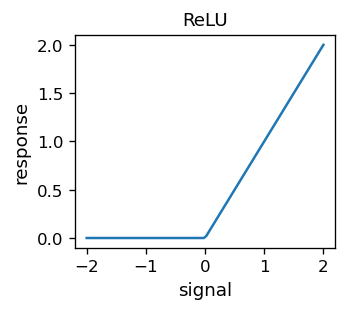

In [5]:
plt.show(draw.plot(func.relu,title='ReLU'))

Różnica dwóch funkcji ReLU o przesuniętych argumentach daje przykładowy wynik

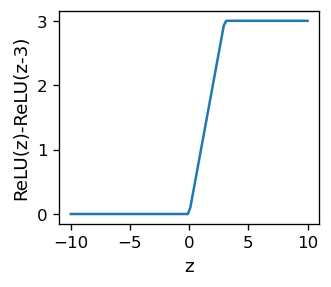

In [6]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [func.relu(z)-func.relu(z-3) for z in s]
plt.plot(s, fs)

plt.xlabel('z',fontsize=11)
plt.ylabel('ReLU(z)-ReLU(z-3)',fontsize=11)
plt.show()

która jakościowo wygląda jak sigmoid, z wyjątkiem ostrych rogów. Aby uzyskać gładkość, można skorzystać z innej funkcji - **softplus**,

$$
{\rm softplus}(x)=\log \left( 1+e^x \right ),
$$
która ma nastepujący wykres:

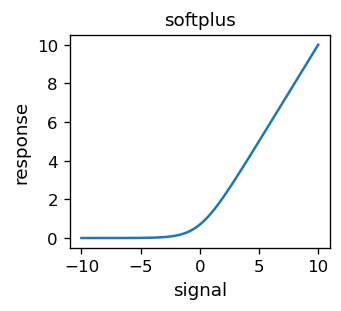

In [7]:
plt.show(draw.plot(func.softplus,title='softplus',start=-10,stop=10))

Różnica dwóch funkcji **softplus** o przesuniętym argumencie daje wynik bardzo podobny do sigmoidu: 

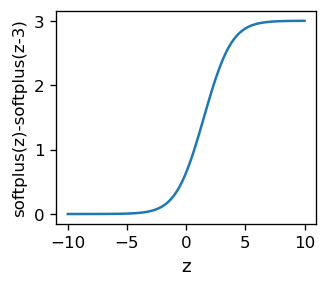

In [8]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [func.softplus(z)-func.softplus(z-3) for z in s]
plt.plot(s, fs)

plt.xlabel('z',fontsize=11)
plt.ylabel('softplus(z)-softplus(z-3)',fontsize=10)
plt.show()

```{note}
Do aktywacji można użyć ReLU, softplus lub wielu innych podobnych funkcji. 
```

Dlaczego właściwie należy to robić, zostanie omówione później. 

## Interpolacja z ReLU

Nasze symulowane dane możemy aproksymować za pomocą sieci ANN z aktywacją ReLU w warstwach pośrednich (w warstwie wyjściowej funcja aktywacji jest identycznościowa, tak jak w poprzednim rozdziale). W poniższych kodach funkcje zostały zaczerpnięte z modułu **func**.

In [9]:
#fff=func.softplus    # short-hand notation
#dfff=func.dsoftplus

fff=func.relu    # short-hand notation
dfff=func.drelu

Sieć musi mieć teraz więcej neuronów, ponieważ sigmoid "rozpada się" na dwie funkcje ReLU:

In [10]:
arch=[1,30,1]                    # architecture
weights=func.set_ran_w(arch, 5) # initialize weights randomly in [-2.5,2.5]

Symulacje przeprowadzamy dokładnie tak samo jak w poprzednim przypadku. Doświadczenie mówi, że należy startować z małymi szybkościami uczenia się. Dwa zestawy rund (podobnie jak w poprzednim rozdziale)

In [11]:
eps=0.0003         # small learning speed
for k in range(30): # rounds
    for p in range(len(features)):          # loop over the data sample points
        pp=np.random.randint(len(features)) # random point
        func.back_prop_o(features,labels,pp,arch,weights,eps,
                         f=fff,df=dfff,fo=func.lin,dfo=func.dlin) # teaching

In [12]:
for k in range(3000): # rounds
#    eps=eps*.995
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features)): # points in sequence
        func.back_prop_o(features,labels,p,arch,weights,eps,
                         f=fff,df=dfff,fo=func.lin,dfo=func.dlin) # teaching

100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  

In [13]:
for k in range(3000): # rounds
    eps=eps*.995
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features)): # points in sequence
        func.back_prop_o(features,labels,p,arch,weights,eps,
                         f=fff,df=dfff,fo=func.lin,dfo=func.dlin) # teaching

100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  

dają wynik

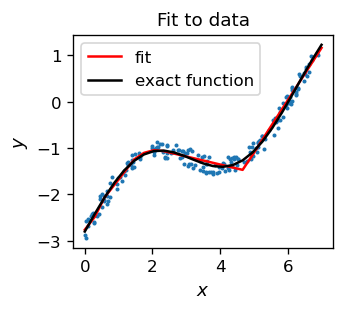

In [14]:
coo=np.linspace(0,7,25)
exact=[fi(x) for x in coo]
res=[func.feed_forward_o(arch, weights, [x], ff=fff, ffo=func.lin)[2][0] for x in coo]

plt.figure(figsize=(2.8,2.3),dpi=120)

plt.title("Fit to data",fontsize=11) 
plt.scatter(features,labels,s=2)

plt.plot(coo,res,c='red',label='fit')
plt.plot(coo,exact,c='black',label='exact function')

plt.legend(prop={'size':10})

plt.xlabel('$x$',fontsize=11)
plt.ylabel('$y$',fontsize=11)
plt.show()

Ponownie uzyskujemy całkiem zadowalający wynik (linia czerwona), zauważając, że wykres funkcji dopasowania jest ciągiem linii prostych, co odzwierciedla właściwości użytej funkcji aktywacji ReLU. Gładki wynik można uzyskać z pomocą funkcji softplus.

##  Klasyfikatory z rektyfikacją

Istnieją techniczne powody przemawiające za stosowaniem w algorytmie backprop [funkcji rektyfikowanych](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) zamiast sigmoidalnych. Pochodne sigmoidu są bowiem bardzo bliskie zera, z wyjątkiem wąskiego obszaru w pobliżu progu. Sprawia to, że aktualizacja wag jest mało prawdopodobna, zwłaszcza gdy cofamy się o wiele warstw wstecz, ponieważ wtedy bardzo małe liczby (określone przez pochodne funkcji) są przemnażane i w zasadzie nie prowadzą do żadnej aktualizacji (zjawsko to jest znane jako **problem zanikającego gradientu**). W przypadku funkcji rektyfikowanych zakres, w którym pochodna jest istotnie różna od zera, jest duży (w przypadku ReLU dotyczy to wszystkich współrzędnych dodatnich), dlatego problem zanikającego gradientu się nie pojawia. Właśnie z tego powodu funkcje rektyfikowane są stosowane w głębokich sieciach ANN, w których jest wiele warstw, niemożliwych do wytrenowania przy funkcjach aktywacji jest typu sigmoidalnego. 


```{note}
Zastosowanie rektyfikowanych funkcji aktywacji było jednym z kluczowych trików, które umożliwiły przełom w rozwoju głębokich ANN około 2011 roku.
```

Z drugiej strony, w przypadku ReLU może się zdarzyć, że niektóre wagi przyjmą takie wartości, że wiele neuronów stanie się nieaktywnych, tzn. nigdy, dla żadnego inputu, nie zadziałają -- zostaną de facto wyeliminowane. Nazywa się to problemem "martwego neuronu" lub "trupa", który pojawia się zwłaszcza wtedy, gdy parametr szybkości uczenia jest zbyt duży. Sposobem na ograniczenie tego problemu jest zastosowanie funkcji aktywacji, która w ogóle nie ma przedziału o zerowej pochodnej, np. [Leaky ReLU](https://en.wikipedia.org/wiki/Activation_function). Tutaj przyjmiemy jej nasepującą postać 


$$
{\rm Leaky~ReLU}(x) = \left \{ \begin{array}{ll} x &{\rm ~~~ for~} x \ge 0 \\
                                          0.1 \, x &{\rm ~~~ for~} x < 0 \end{array}    \right . .
$$



Dla ilustracji powtórzymy nasz przykład z rozdz. {ref}`circ-lab` z klasyfikacją punktów w kole z wykorzystaniem funkcji Leaky ReLU.

In [15]:
def cir():
    x1=np.random.random() # coordinate 1
    x2=np.random.random() # coordinate 2
    if((x1-0.5)**2+(x2-0.5)**2 < 0.4*0.4): # inside the circle of radius 0.4
                                            # centered at (0.5,0.5)
        return np.array([x1,x2,1])
    else:                                              # outside
        return np.array([x1,x2,0])


In [16]:
sample_c=np.array([cir() for _ in range(1000)]) # sample
features_c=np.delete(sample_c,2,1)
labels_c=np.delete(np.delete(sample_c,0,1),0,1)

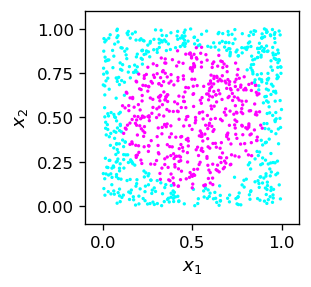

In [17]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(sample_c[:,0],sample_c[:,1],c=sample_c[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)
plt.show()

Przyjmujemy następującą architekturę i parametry początkowe:

In [18]:
arch_c=[2,20,1]                   # architecture
weights=func.set_ran_w(arch_c,3)  # scaled random initial weights in [-1.5,1.5]
eps=.01                           # initial learning speed 

i uruchamiamy algorytm w dwóch etapach: z Leaky ReLU, a następnie z ReLU:

In [19]:
for k in range(300):    # rounds
    eps=.999*eps       # decrease the learning speed
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop_o(features_c,labels_c,p,arch_c,weights,eps,
            f=func.lrelu,df=func.dlrelu,fo=func.sig,dfo=func.dsig) 
                    # backprop with leaky ReLU

100  200  300  

In [20]:
for k in range(700):    # rounds
    eps=.995*eps       # decrease the learning speed
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop_o(features_c,labels_c,p,arch_c,weights,eps,
            f=func.relu,df=func.drelu,fo=func.sig,dfo=func.dsig) 
                    # backprop with ReLU

100  200  300  400  500  600  700  

Wynik jest całkiem zadowalający, co pokazuje, że metoda działa. Przy obecnej architekturze i funkcjach aktywacji, co nie jest zaskakujące, na poniższym wykresie można zauważyć ślady wielokąta przybliżającego koło. 

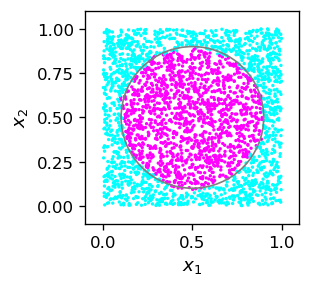

In [21]:
test=[] 

for k in range(3000):
    po=[np.random.random(),np.random.random()] 
    xt=func.feed_forward_o(arch_c,weights,po,ff=func.relu,ffo=func.sig)   
    test.append([po[0],po[1],np.round(xt[len(arch_c)-1][0],0)])

tt=np.array(test)

fig=plt.figure(figsize=(2.3,2.3),dpi=120)

# drawing the circle
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='gray', fill=False)
ax.add_patch(circ)

plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)
plt.show()

## Ćwiczenia

```{admonition} $~$
:class: warning

1. Zastosuj różne rektywikowane funkcje aktywacji dla klasyfikatorów binarnych i przetestuj je na różnych kształtach (analogicznie do przykładu z kołem powyżej).

2. Przekonaj się, że uruchomienie algorytmu backprop (z funkcją ReLU) ze zbyt dużą początkową szybkością uczenia prowadzi do problemu "martwego neuronu" i niepowodzenia algorytmu. 

```